In [2]:
# Make code toggle-able for easier review.
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<i>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a></i>.''')

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

In [4]:
# Import the data
airbnb = pd.read_csv('/Users/guest/Documents/Education/Thinkful/Unit 1/Lesson 3 (Intermediate Data Viz)/s3/oakland_airbnb_data.csv')

In [5]:
# Streamline property types
for ptype in airbnb['property_type'].unique():
    if len(airbnb[airbnb['property_type'].str.contains(ptype)]) < len(airbnb)/20:
        airbnb['property_type'] = airbnb['property_type'].apply(lambda s: s.replace(ptype, 'Other'))

In [6]:
# Eliminate redundant zipcode
airbnb['zip'] = airbnb['zip'].apply(lambda s: s.replace('94610-2428', '94610'))

In [7]:
# Overall aesthetics
sns.set(style='whitegrid', palette='pastel', color_codes=True,)

# Formatting for USD tick labels
tick = mtick.StrMethodFormatter('${x:,.0f}')

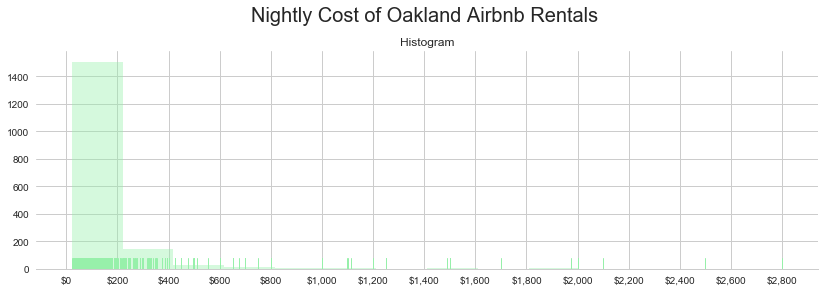

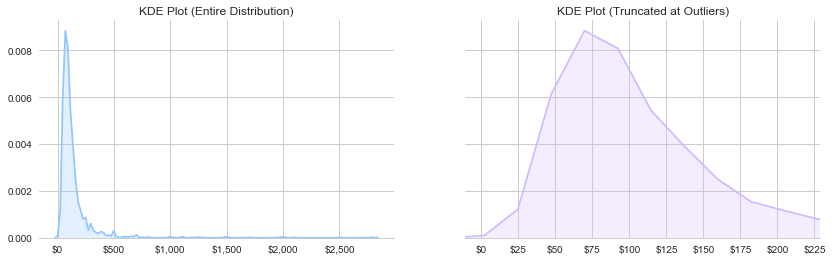

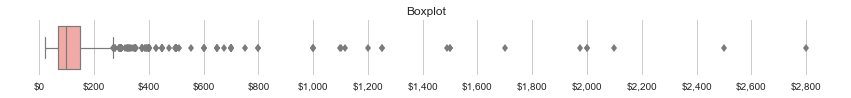

In [11]:
# Frequency Histogram

fig = plt.figure(figsize=(14,4))
g = sns.distplot(airbnb['price'],
                 bins=14,
                 color='g', 
                 kde=False, 
                 rug=True)
sns.despine(top=True, left=True, right=True)

g.xaxis.set_major_formatter(tick)
g.xaxis.set_major_locator(mtick.MultipleLocator(200))
g.set(xlabel='', ylabel='')
plt.title('Histogram')

plt.text(y=1800,
         x=1400,
         size=20,
         ha='center',
         s='Nightly Cost of Oakland Airbnb Rentals') # overall title

plt.show()



# KDE Plot (Entire Distribution)

fig = plt.figure(figsize=(14,4))

g = fig.add_subplot(1,2,1)
sns.kdeplot(airbnb['price'],
                shade=True,
                color='b',
                legend=False);
sns.despine(top=True, left=True)

g.xaxis.set_major_formatter(tick)
g.xaxis.set_major_locator(mtick.MultipleLocator(500))
g.set(xlabel='', ylabel='')

plt.title('KDE Plot (Entire Distribution)')



# KDE Plot (Truncated at Outliers)

q75, q25 = np.percentile(airbnb['price'], [75 ,25])
iqr = q75 - q25
upper_xlim = q75 + iqr
lower_xlim = q25 - iqr

g = fig.add_subplot(1,2,2)
sns.kdeplot(airbnb['price'],
                shade=True,
                color='m',
                legend=False);
sns.despine(top=True, left=True)

g.axes.set_xlim(lower_xlim,upper_xlim)
g.xaxis.set_major_formatter(tick)
g.xaxis.set_major_locator(mtick.MultipleLocator(25))
g.set(yticklabels=[])
g.set(xlabel='', ylabel='')
plt.title('KDE Plot (Truncated at Outliers)')

plt.show()



# Boxplot

fig = plt.figure(figsize=(15,1))
g = sns.boxplot(x=airbnb['price'],
                color='r',
                fliersize=6,
                linewidth=1.2)
sns.despine(top=True, bottom=True, left=True)

g.xaxis.set_major_formatter(tick) 
g.xaxis.set_major_locator(mtick.MultipleLocator(200))
g.set(xlabel='', ylabel='', )
plt.title('Boxplot')

plt.show()

### Histogram

**PROS:** Displays actual frequencies of bucketed values; easy to apply; works for continuous, discrete, and unordered data. Rugplot helps to clarify positions of individual datapoints. <br>
**CONS:** The more skewed the data is, the more space the histogram takes up  and the harder it is to read; inappropriate for comparison of multiple categories.

### KDE Plot (Overall)
**PROS:** Allows for a general look at the distribution without having to tweak bin sizes.<br>
**CONS:** Does not display data directly.

### KDE Plot (Truncated)
**PROS:** Omitting outliers allows for a closer, less stretched look at the distribution.<br>
**CONS:** In addition to typical KDE plot cons (see above), truncation omits data and should not be used in the absence of a visualization of the full distribution.

### Boxplot
**PROS:** Easily identifies skewed distributions, superior to histogram for comparison of multiple groups, easily identifies outliers.<br>
**CONS:** Does not provide much detail about the data as a histogram or KDE plot.

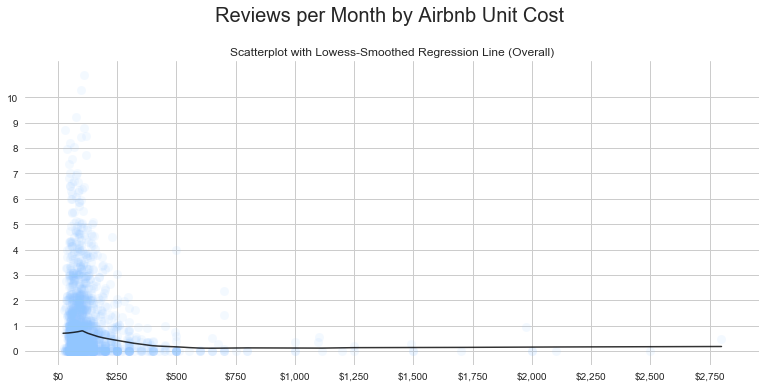

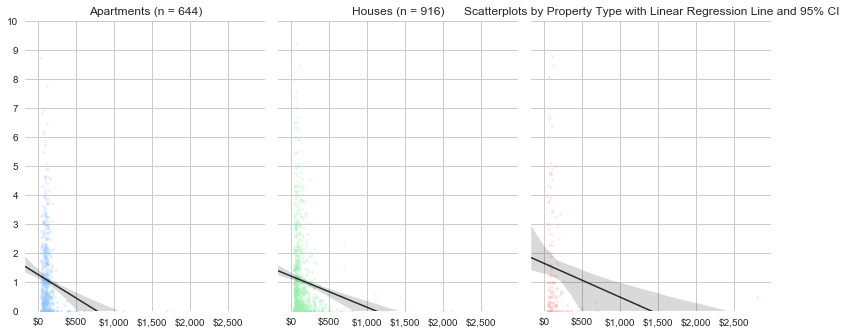

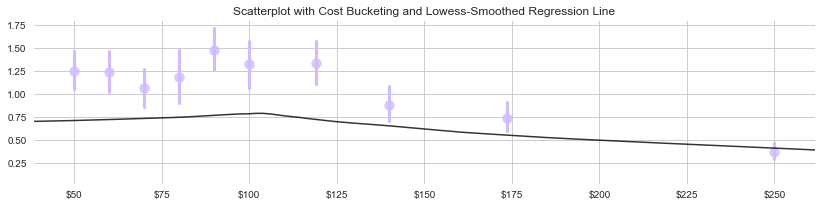

In [14]:
# Overall Scatterplot


g = sns.lmplot(x='price',
               y='reviews_per_month',
               data=airbnb,
               aspect=2.2,
               scatter_kws={'alpha':0.1,
                            's': 80,
                            'color': 'b'},
               line_kws={'color':'black',
                         'linewidth':1.5,
                         'alpha':0.8},
               lowess=True)
sns.despine(left=True, bottom=True)

yticks = range(0, 11)
xticks = range(0,3000,250)

g = (g.set_axis_labels('', '')
     .set(xticks=xticks,yticks=yticks))

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels())
    ax.xaxis.set_major_formatter(tick)

plt.text(y=13,
         x=1400,
         size=20,
         ha='center',
         s='Reviews per Month by Airbnb Unit Cost') # overall title

plt.title('Scatterplot with Lowess-Smoothed Regression Line (Overall)')

plt.show()



# Scatterplot by Property Type

yticks = range(0, 11)
xticks = range(0,3000,500)


g = sns.lmplot(x='price',
               y='reviews_per_month',
               col='property_type',
               hue='property_type',
               data=airbnb,
               aspect=.75,
               scatter_kws={'alpha':0.2,
                            's': 10},
               line_kws={'color':'black',
                         'linewidth':1.5,
                         'alpha':0.8},
               ci=95)
sns.despine(left=True, bottom=True)

plt.ylim(0,10)

g = (g.set_axis_labels('', '')
     .set(xticks=xticks,yticks=yticks))


col_order = ['Apartments (n = 644)', 'Houses (n = 916)', 'Other (n = 153)']
for ax, title in zip(g.axes.flat, col_order):
    ax.set_title(title)

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels())
    ax.xaxis.set_major_formatter(tick)

plt.title('Scatterplots by Property Type with Linear Regression Line and 95% CI')
    
plt.show()



# Bucketed Scatterplot

fig = plt.figure(figsize=(14,3))

g = sns.regplot(x='price',
                y='reviews_per_month',
                data=airbnb,
                fit_reg=True,
                lowess=True,
                x_bins = 10,
                color='m',
                ci=95,
                scatter_kws={'alpha':0.8,'s':100},
                line_kws={'color':'black',
                         'linewidth':1.5,
                         'alpha':0.8},) 
sns.despine(left=True, bottom=True)

g.xaxis.set_major_formatter(tick)
g.xaxis.set_major_locator(mtick.MultipleLocator(25))
g.set(xlabel='', ylabel='')

plt.title('Scatterplot with Cost Bucketing and Lowess-Smoothed Regression Line')

plt.show()

### Overall Scatterplot
**PROS:** Displays all data; lowess-smoothed lines do not misrepresent data.<br>
**CONS:** Lowess smoothing risks overfitting the data; seaborn cannot currently plot a confidence interval with lowess smoothed regression lines; scatterplots make it difficult to visualize density in very skewed distributions; not suitable for visualizing multiple groups in large datasets.

### Split by type of Unit
**PROS:** Allows for comparison between groups; able to display confidence interval; splitting the data into smaller chunks helps to visualize density.<br>
**CONS:** Does not provide an overall look at the data; linear regression line is predictively limited because it does not represent the distribution of this dataset very well.

### Bucketed
**PROS:** Allows for a more visually parseable estimation of the regression line given a skewed dataset; takes up less space than a scatterplot.<br>
**CONS:** Does not display actual data.

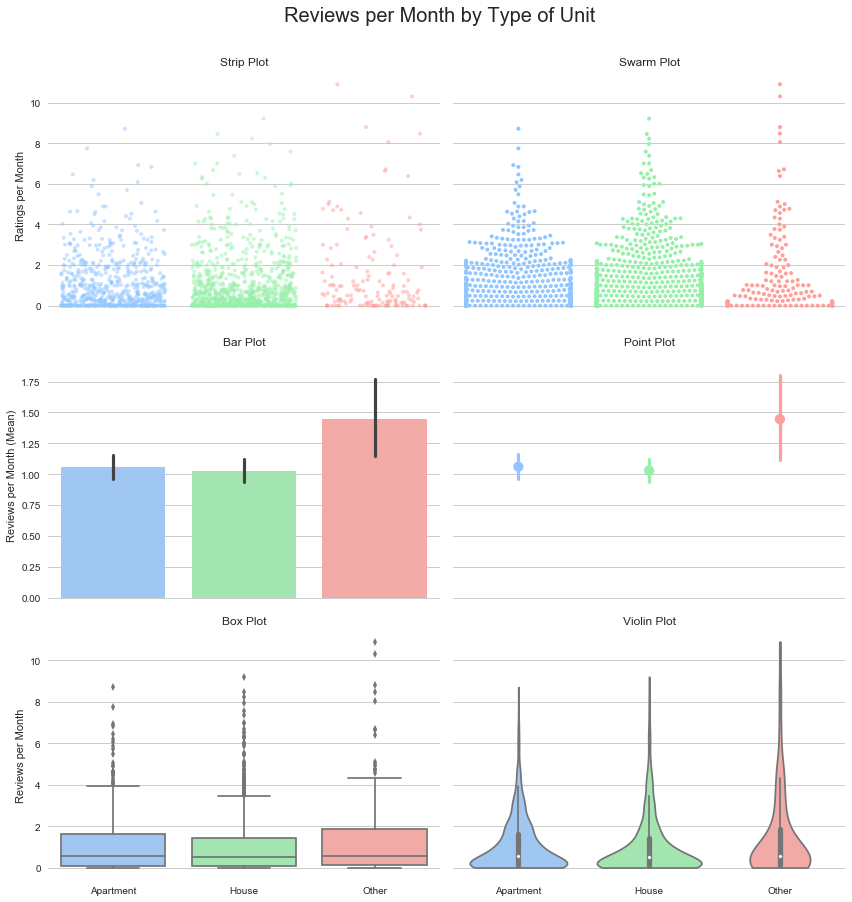

In [49]:
fig = plt.figure(figsize=(12,12))



# Strip plot
g = fig.add_subplot(3,2,1)
sns.stripplot(x='property_type', 
              y='reviews_per_month', 
              jitter='.4',
              alpha=0.5,
              size=4,
              data=airbnb)

g.set(xlabel='', ylabel='Ratings per Month')
g.set(xticklabels=[])

plt.title('Strip Plot')



plt.text(y=14,
         x=2.5,
         size=20,
         ha='center',
         s='Reviews per Month by Type of Unit') # overall title




# Swarm plot
g = fig.add_subplot(3,2,2)
sns.swarmplot(x='property_type', 
              y='reviews_per_month', 
              size=4,
              data=airbnb)

g.set(xlabel='', ylabel='')
g.set(xticklabels=[])
g.set(yticklabels=[])

plt.title('Swarm Plot')



# Standardize the y-axis for bar and point plots
yticks = [0.0,0.25,0.5,0.75,1,1.25,1.5,1.75]

# Bar plot
g = fig.add_subplot(3,2,3)
sns.barplot(x='property_type', 
               y='reviews_per_month', 
               data=airbnb, 
               ci=95)

plt.ylim(-.01,2)
plt.yticks(yticks)
g.set(xlabel='', ylabel='Reviews per Month (Mean)')
g.set(xticklabels=[])

plt.title('Bar Plot')



# Point plot
g = fig.add_subplot(3,2,4)
sns.pointplot(x='property_type', 
               y='reviews_per_month',
               data=airbnb, 
               kind='point',
               palette='pastel',
               ci=95, 
               dodge=True,
               join=False)

plt.ylim(-.01,2)
plt.yticks(yticks)
g.set(xlabel='', ylabel='')
g.set(xticklabels=[])
g.set(yticklabels=[])

plt.title('Point Plot')



#Box Plot
g = fig.add_subplot(3,2,5)
sns.boxplot(x='property_type', 
               y='reviews_per_month',
               data=airbnb)
sns.despine(trim=True, left=True, bottom=True)

g.set(xlabel='', ylabel='Reviews per Month')

plt.title('Box Plot')



# Violin Plot
g = fig.add_subplot(3,2,6)
sns.violinplot(x='property_type', 
               y='reviews_per_month',
               data=airbnb,
               cut=0)
sns.despine(trim=True, left=True, bottom=True)

g.set(xlabel='', ylabel='')
g.set(yticklabels=[])

plt.title('Violin Plot')



plt.tight_layout()
plt.show()

### Strip Plot
**PROS:** Visually simple; does not take up much space; easy to read.<br>
**CONS:** Points overlap, inhibiting clarity in skewed datasets.

### Swarm Plot
**PROS:** Given enough space, points do not overlap; allows for a clearer visualization of point density than a strip plot.<br>
**CONS:** Takes up more space than a strip plot.

### Bar Plot
**PROS:**Allows for comparison of lengths as well as position.<br> 
**CONS:** Takes up a lot of space; difficult to visually parse differences between groups, especially when multiple categorical variables are being compared at once.

### Point Plot
**PROS:** Easier to read than a bar plot; takes up very little space; good for comparing several categorical variables at once.<br>
**CONS:** Only compares position, not length.

### Box Plot
**PROS:** Allows for easy visualization of specific outliers.<br>
**CONS:** Shows less information about the distribution than a violin plot.

### Violin Plot
**PROS:** Shows more information about the distribution than a box plot.<br>
**CONS:** Outliers are subsumed into the violin plot's tail; making identification of specific points harder.
